# Happiness in the world in 2019

We all know that 2020 is being a very hard year, both in terms of health, and social and economic, but... Which of these parameters can have the greatest impact on people's happiness? Is it the same in all parts of the world or is it culturally independent?

For this, we will carry out an analysis of the happiness data in 2019 just with other important aspects to carry out the study.

The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll. This question, known as the Cantril ladder, asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale. The scores are from nationally representative samples for the years 2013-2016 and use the Gallup weights to make the estimates representative.

In [1]:
# packages
import pandas as pd 

# Read datafile cvs with pandas
data = pd.read_csv('happy_2019.csv') 

# first 5 lines of the loaded data 
data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7769,1340,1587,986,596,153,393
1,2,Denmark,7600,1383,1573,996,592,252,410
2,3,Norway,7554,1488,1582,1028,603,271,341
3,4,Iceland,7494,1380,1624,1026,591,354,118
4,5,Netherlands,7488,1396,1522,999,557,322,298


In [2]:
# we need to see the columns completely
print(data.columns, '\n') # I use \n for add space

# type of data by variable
print(data.dtypes)

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object') 

Overall rank                     int64
Country or region               object
Score                            int64
GDP per capita                   int64
Social support                   int64
Healthy life expectancy          int64
Freedom to make life choices     int64
Generosity                       int64
Perceptions of corruption        int64
dtype: object


We can see the names of the columns. The columns provide the values of the variables of 6 factors: economic production, social support, life expectancy, freedom, absence of corruption and generosity. In principle, in a utopia, we should observe maximum values in each of the variables, while in a dystrophy, we would observe minimum values in each of the columns.

To make a quick look to see which of the variables can be important, we will make a correlation matrix between numerical variables.

In [3]:
# we exclude 'Overall rank' column
df1 = data[data.columns.difference(["Overall rank"])]

# show table with correlations between variables
coor = df1.corr()
coor

,Freedom to make life choices,GDP per capita,Generosity,Healthy life expectancy,Perceptions of corruption,Score,Social support
Freedom to make life choices,1.000000,0.379079,0.269742,0.390395,0.438843,0.566742,0.447333
GDP per capita,0.379079,1.000000,-0.079662,0.835462,0.298920,0.793883,0.754906
Generosity,0.269742,-0.079662,1.000000,-0.029511,0.326538,0.075824,-0.048126
Healthy life expectancy,0.390395,0.835462,-0.029511,1.000000,0.295283,0.779883,0.719009
Perceptions of corruption,0.438843,0.298920,0.326538,0.295283,1.000000,0.385613,0.181899
Score,0.566742,0.793883,0.075824,0.779883,0.385613,1.000000,0.777058
Social support,0.447333,0.754906,-0.048126,0.719009,0.181899,0.777058,1.000000


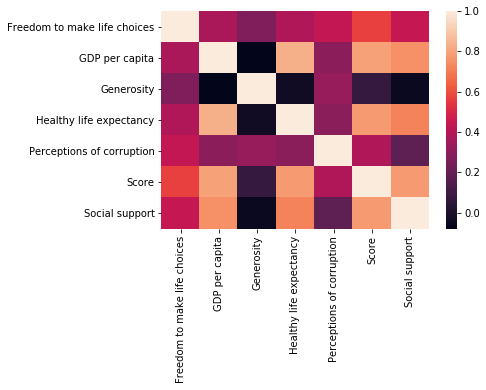

In [4]:
# package for plot
import seaborn as sns

# plot
sns.heatmap(coor, xticklabels = coor.columns.values, yticklabels = coor.columns.values)

We can observe in the color scale, the values closer to 1 (perfect correlation), acquire a softer tone. Thus, looking at the variable 'Score' on the graph and looking for the smoothest colors with the variables that are correlated, we find that 'GPD per capita', 'Heathly life expected' and 'Social support', are the variables with the highest correlation with the score in happiness.

Now that we have this information, we will try to obtain a model that explains this correlation to try to analyze this case. The study will be conducted first for each of the variables. Then we will make a correlation model for the three variables.

## Model that explains happiness through GPD per capita

In [5]:
# First, we have to select the data we want.
df2 = data[['Country or region', 'Score', 'GDP per capita']]

# now we must see if there are missing data 
print(df2.isna().any())

# and a little summary of data
df2[['Score', 'GDP per capita']].describe()

Country or region    False
Score                False
GDP per capita       False
dtype: bool


,Score,GDP per capita
count,156.000000,156.000000
mean,5407.096154,905.147436
std,1113.119869,398.389464
min,2853.000000,0.000000
25%,4544.500000,602.750000
50%,5379.500000,960.000000
75%,6184.500000,1232.500000
max,7769.000000,1684.000000


We have not observed NA data, but instead, we have detected null (zero) data in GPD per capita. This could be equivalent to missing data for a particular country and could hurt our model.

In [6]:
# Let's see the countries with a value of 0 in GDP per capita
df2[df2['GDP per capita'] == 0]

,Country or region,Score,GDP per capita
111,Somalia,4668,0


We can see that Somalia has a happiness score slightly below the average, 4668 for the average of 5407. However, the standard deviation of happiness is 1113, which makes us think that this is quite correct, as opposed to GDP per capita, which is 0.

We will remove Somalia from our data to avoid problems in our correlation model.

In [7]:
# drop Somalia
df2_clean = df2.drop([111]).copy()

# let's see summary
df2_clean[['Score', 'GDP per capita']].describe()

,Score,GDP per capita
count,155.000000,155.000000
mean,5411.864516,910.987097
std,1115.128460,392.925408
min,2853.000000,26.000000
25%,4541.000000,615.000000
50%,5386.000000,960.000000
75%,6187.000000,1234.000000
max,7769.000000,1684.000000


Now we will make a graph to see if there is any relation a priori between 'GDP per capita' and 'Score'.

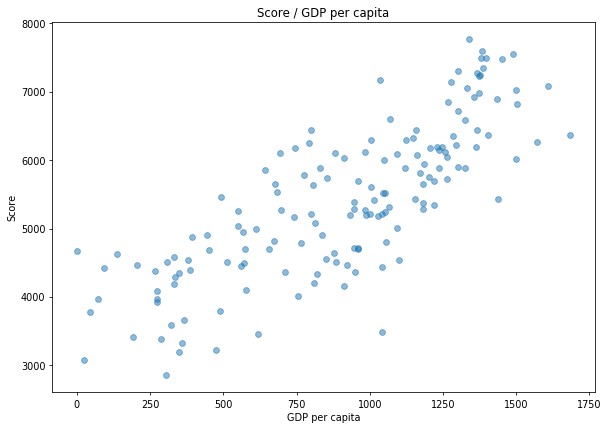

In [20]:
# package 
import matplotlib.pyplot as plt

# data
y_axis = df2['Score'] # possible dependent variable
x_axis = df2['GDP per capita'] # possible independent variable

# Plot
plt.figure(figsize= (10, 7), dpi= 70) # size plot
plt.scatter(x_axis, y_axis, alpha=0.5) # assignment of the variables to the axes

plt.title('Score / GDP per capita') # tittle
plt.xlabel('GDP per capita') # label of x axis
plt.ylabel('Score') # label of y axis

# show the plot
plt.show()

A certain tendency towards linearity can be seen. According to the previous study, Score and GDP per capita have an R coefficient of 0.79, quite strong

Let's calculate the model with a linear model, to see its results.

In [27]:
# packages
import numpy as np
import scipy.stats

# data
y = df2['Score'] # possible dependent variable
x = df2['GDP per capita'] # possible independent variable

# Pearson correlation coefficient and p-value
pearCoor, pvalue = scipy.stats.pearsonr(x, y)
print("Correlation coefficient {} and p-value {}".format(round(pearCoor, 2), round(pvalue, 5)))

Correlation coefficient 0.79 and p-value 0.0


We see that it has a p-value below 0.05, which means that the result is significant.

In [24]:
scipy.stats.spearmanr(x, y)   # Spearman's rho

SpearmanrResult(correlation=0.8144834033942763, pvalue=3.052425844116973e-38)

In [25]:
scipy.stats.kendalltau(x, y)  # Kendall's tau

KendalltauResult(correlation=0.6199934327488547, pvalue=1.642184505577228e-30)